In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
def saturation(val): #클램핑함수
  if val> 255:
    return 255
  elif val < 0:
    return 0
  else:
    return val

(256, 256, 3)
(256, 256)


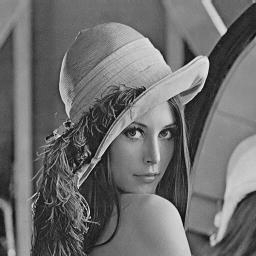

In [3]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/lena256.jpg')
print(img.shape)
gimg1 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
#plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg1)

In [4]:
kernel3 = np.ones((3,3),np.float32)/9
kernel5 = np.ones((5,5),np.float32)/25
kernel7 = np.ones((7,7),np.float32)/49

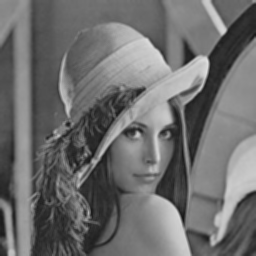

In [ ]:
output = cv2.filter2D(gimg1,-1,kernel3)
cv2_imshow(output)

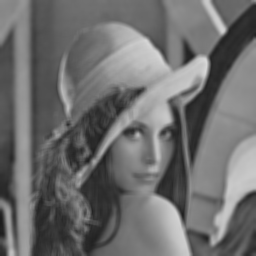

In [5]:
output = cv2.filter2D(gimg1,-1,kernel5)
cv2_imshow(output)

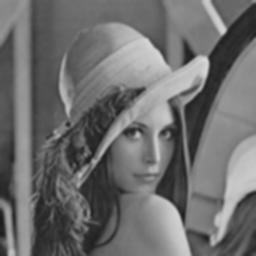

In [ ]:
output2 = cv2.filter2D(output,-1,kernel3)
cv2_imshow(output2)

In [6]:
gout = np.zeros((gimg1.shape[0],gimg1.shape[1]),dtype = np.ubyte)

콘불루션(convolution)

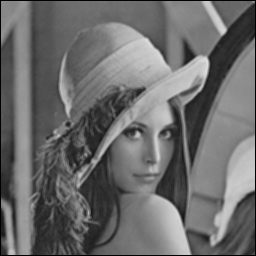

In [ ]:
for h in range(1,gimg1.shape[0]-1):
  for w in range(1,gimg1.shape[1]-1):
    sum = 0
    for i in range(-1,2):
      for j in range(-1,2):
        sum +=gimg1[h+i,w+j]*kernel3[i+1,j+1] #h,w에 마스크를 덮어씌움
    sum = saturation(sum)
    gout[h,w] = sum

cv2_imshow(gout)


5by5

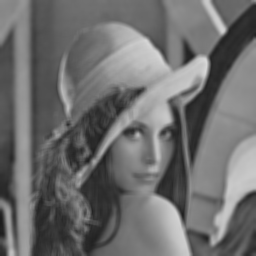

In [ ]:
output3 = cv2.filter2D(gimg1,-1,kernel5)
cv2_imshow(output3)

highpass(고주파 패스)

In [8]:
kernel3[0][0] = -1/9
kernel3[0][1] = -1/9
kernel3[0][2] = -1/9
kernel3[1][0] = -1/9
kernel3[1][1] = 8/9
kernel3[1][2] = -1/9
kernel3[2][0] = -1/9
kernel3[2][1] = -1/9
kernel3[2][2] = -1/9

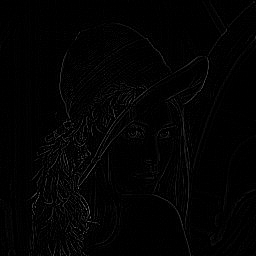

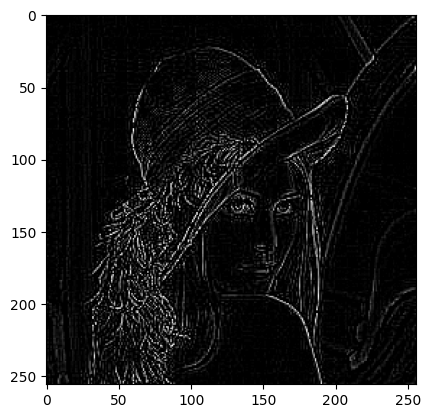

In [13]:
output4 = cv2.filter2D(gimg1,-1,kernel3)
output5 = output4*5
cv2_imshow(output4)
plt.imshow(output5,cmap='gray')

페퍼 솔트 노이즈 (평균필터링) 제거

(256, 256, 3)
(256, 256)


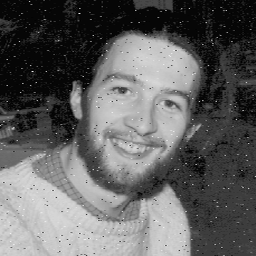

In [16]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/sp_noise.bmp')
print(img.shape)
gimg2 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print(gimg2.shape)
#plt.imshow(gimg2, cmap='gray')
cv2_imshow(gimg2)

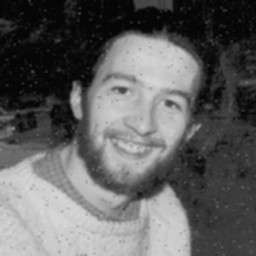

In [17]:
#3by3 평균필터링
outimg = cv2.blur(gimg2,(3,3))
cv2_imshow(outimg)

가우시안 노이즈 제거

(558, 556, 3)
(558, 556)


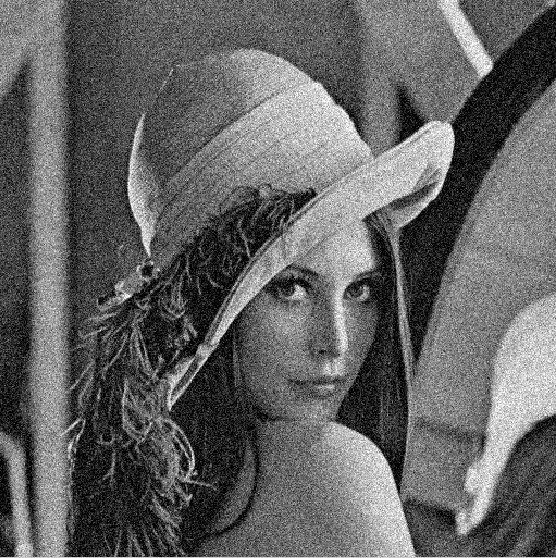

In [20]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/LenaG2.jpg')
print(img.shape)
gimg3 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print(gimg3.shape)
#plt.imshow(gimg2, cmap='gray')
cv2_imshow(gimg3)

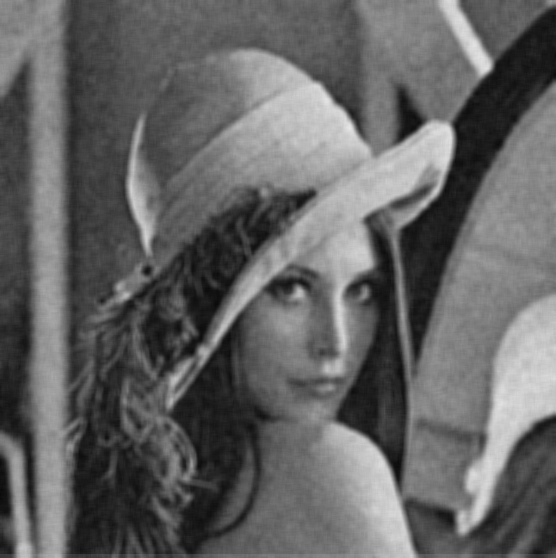

In [25]:
outimg5 = cv2.blur(gimg3,(7,7))
cv2_imshow(outimg5)

(559, 557, 3)
(559, 557)


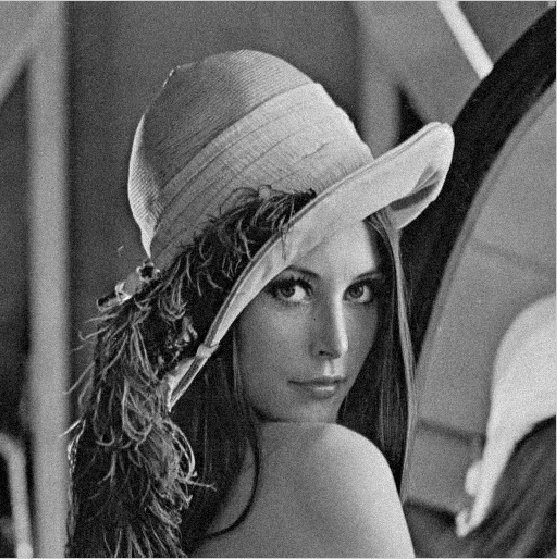

In [22]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/LenaG1.jpg')
print(img.shape)
gimg4 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print(gimg4.shape)
#plt.imshow(gimg2, cmap='gray')
cv2_imshow(gimg4)

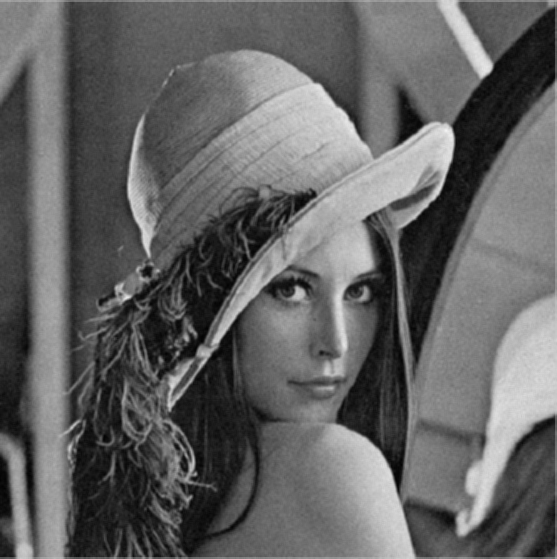

In [24]:
outimg6 = cv2.blur(gimg4,(3,3))
cv2_imshow(outimg6)

솔트 페퍼 노이즈 제거 (중간값 필터링)

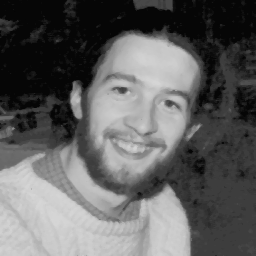

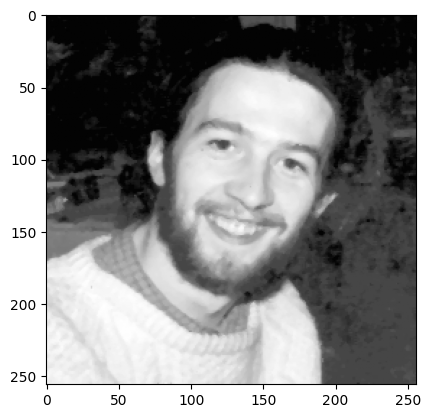

In [28]:
outimg6=cv2.medianBlur(gimg2,3)
cv2_imshow(outimg6)
plt.imshow(outimg6,cmap='gray')